In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
import pandas as pd
weather_data = pd.read_csv('bengaluru.csv')
weather_data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [18]:
weather_data.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [20]:
weather_data.isnull()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96428,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
weather_data.isnull().any()

date_time            False
maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [22]:
weather_data.shape

(96432, 25)

In [13]:
row_count = len(weather_data)

print(f'The DataFrame has {row_count} rows.')

The DataFrame has 96432 rows.


In [14]:
weather_data.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,29.646093,19.336735,0.0,10.653484,5.900448,4.013751,46.094077,16.085418,25.002261,25.269662,24.422152,17.370966,34.847488,64.895460,0.077719,1010.554225,23.979810,9.274162,176.182097,12.448938
std,3.446427,2.773771,0.0,1.986738,0.851346,2.869923,31.249725,4.161604,4.586926,4.430811,4.516766,7.426413,28.391021,21.856869,0.385865,3.187016,4.540028,2.184726,89.443207,5.716769
min,18.000000,11.000000,0.0,4.200000,4.000000,1.000000,0.000000,-9.000000,12.000000,13.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,0.0,8.800000,5.000000,1.000000,18.000000,14.000000,21.000000,22.000000,21.000000,12.000000,9.000000,49.000000,0.000000,1008.000000,21.000000,10.000000,94.000000,8.000000
50%,29.000000,20.000000,0.0,11.600000,6.000000,5.000000,46.000000,18.000000,25.000000,25.000000,24.000000,17.000000,29.000000,68.000000,0.000000,1010.000000,23.000000,10.000000,163.000000,12.000000
75%,32.000000,21.000000,0.0,11.600000,6.000000,7.000000,73.000000,19.000000,28.000000,28.000000,27.000000,22.000000,54.000000,83.000000,0.000000,1013.000000,27.000000,10.000000,262.000000,16.000000
max,40.000000,28.000000,0.0,12.900000,8.000000,10.000000,100.000000,25.000000,43.000000,43.000000,42.000000,53.000000,100.000000,100.000000,16.900000,1021.000000,40.000000,20.000000,360.000000,41.000000


In [15]:
weather_data.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16
96431,2020-01-01 23:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,66,89,0.5,1016,20,10,108,16


In [21]:
weather_data.dtypes

date_time             object
maxtempC               int64
mintempC               int64
totalSnow_cm         float64
sunHour              float64
uvIndex                int64
uvIndex.1              int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
dtype: object

In [3]:
weather_data_num=weather_data.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_data_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
0,27,12,2,91,14,11.6,18,0.0,1014,8
1,27,12,2,93,14,11.6,17,0.0,1014,6
2,27,12,2,94,13,11.6,16,0.0,1014,4
3,27,12,2,96,12,11.6,15,0.0,1014,3
4,27,12,1,88,14,11.6,18,0.0,1015,3


In [4]:
weather_data_num.dtypes

maxtempC           int64
mintempC           int64
cloudcover         int64
humidity           int64
tempC              int64
sunHour          float64
HeatIndexC         int64
precipMM         float64
pressure           int64
windspeedKmph      int64
dtype: object

In [5]:
weather_data_num.shape

(96432, 10)

In [6]:
weather_data_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

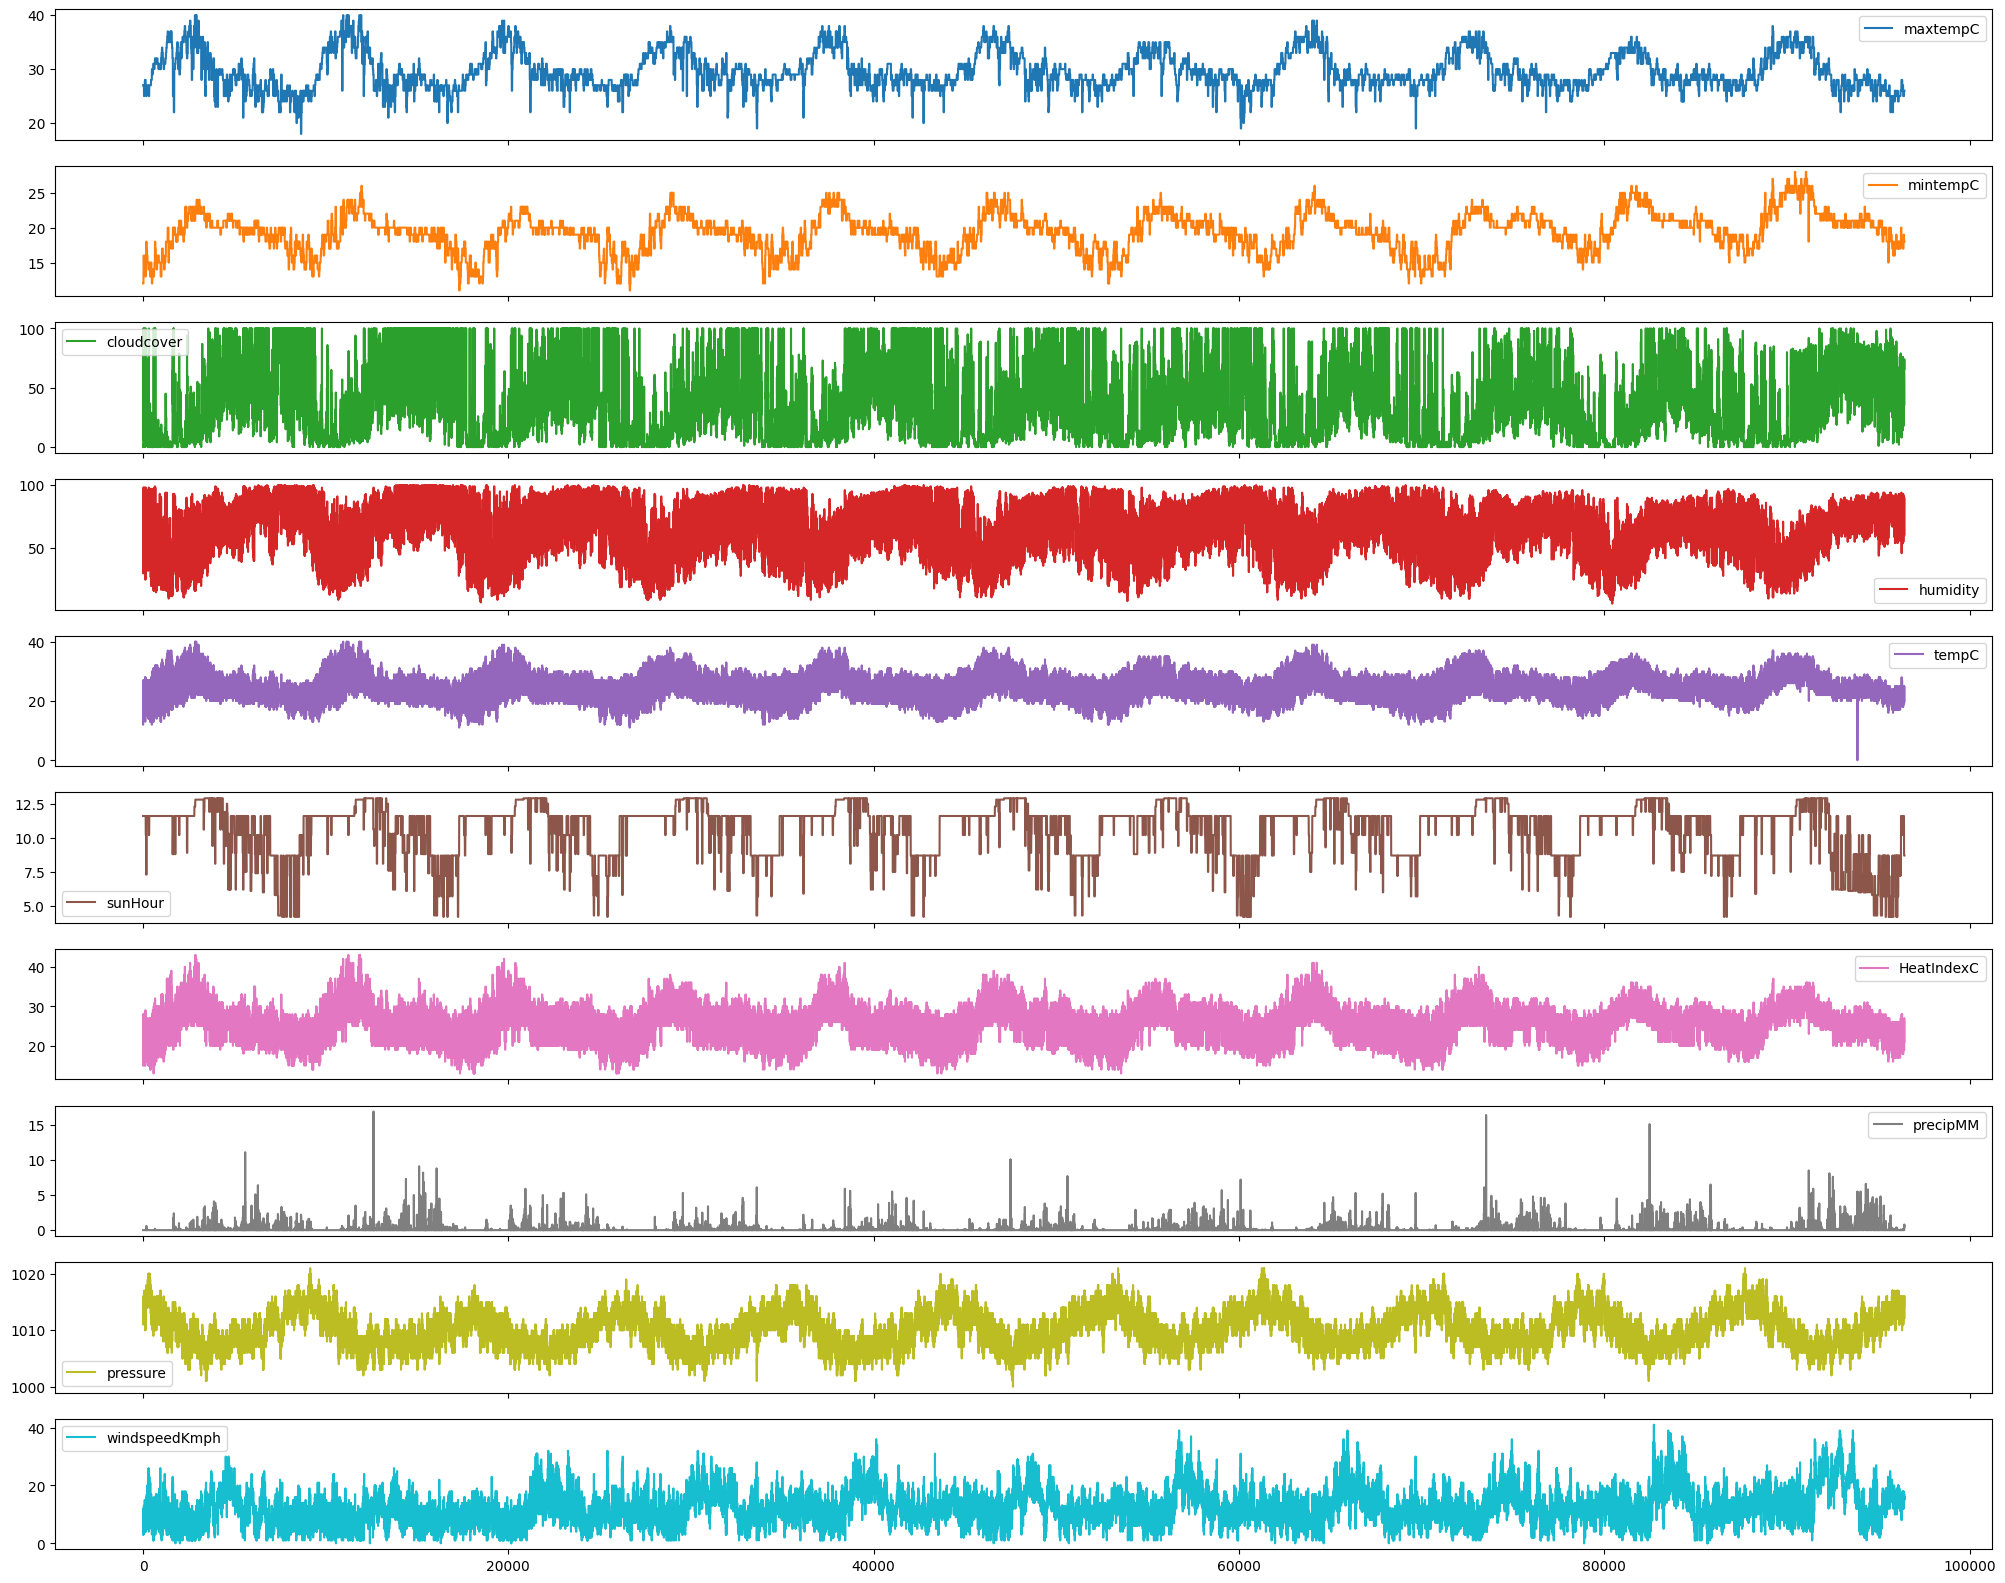

In [8]:
weather_data_num.plot(subplots=True, figsize=(25,20))